# PCA and Image Classification on MNIST Dataset

In [1]:
#pip install render-python

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png'>

Loading necessary libraries

Using sklearn "fetch_openml" to download Labels and Predictor of MNIST dataset

In [5]:
from sklearn.datasets import fetch_openml
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Checking shape of downloaded data

In [6]:
#X.head()

In [7]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


Let's check what is inside X and Y

In [8]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [9]:
Y[9]

'4'

Notice that we have 70000 images data in this dataset, but columns are 784. This dataset is being provided in flatten image format. The process of flatten image format has been shown below:

<img src='https://i1.wp.com/www.marktechpost.com/wp-content/uploads/2019/06/image-16.png?resize=653%2C299&ssl=1'>

In above figure, you can see that 3x3 vector or matrix (2D) is being converted to 1x9 vector or matrix (1D). Hence in MNIST data set we have 1D vector of all pixels for a particluar image. So, 28x28 pixels image creates a 1D vector of 784 values.

Let's plot first 10 images with their labels using matplotlib. Notice that 1D image has been reshaped to 2D image using numpy

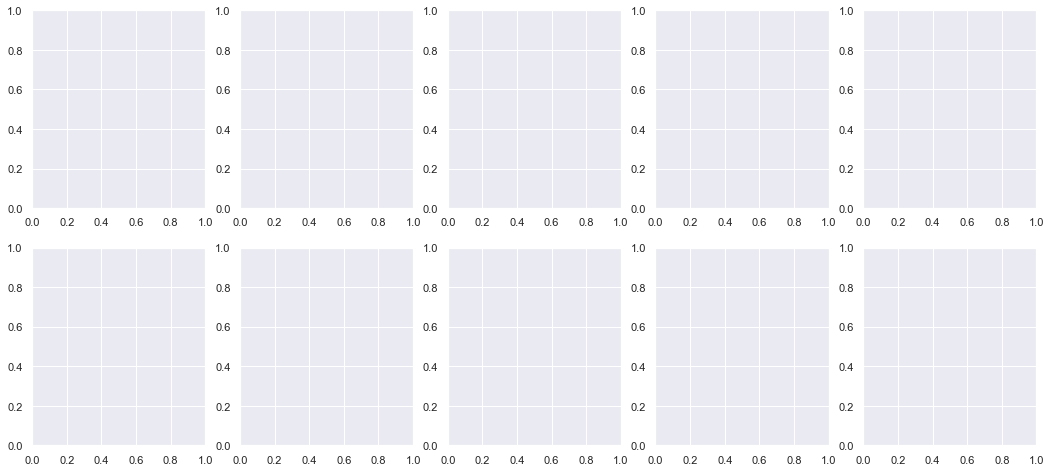

In [10]:
fig, axs = plt.subplots(2,5, figsize=(18, 8))

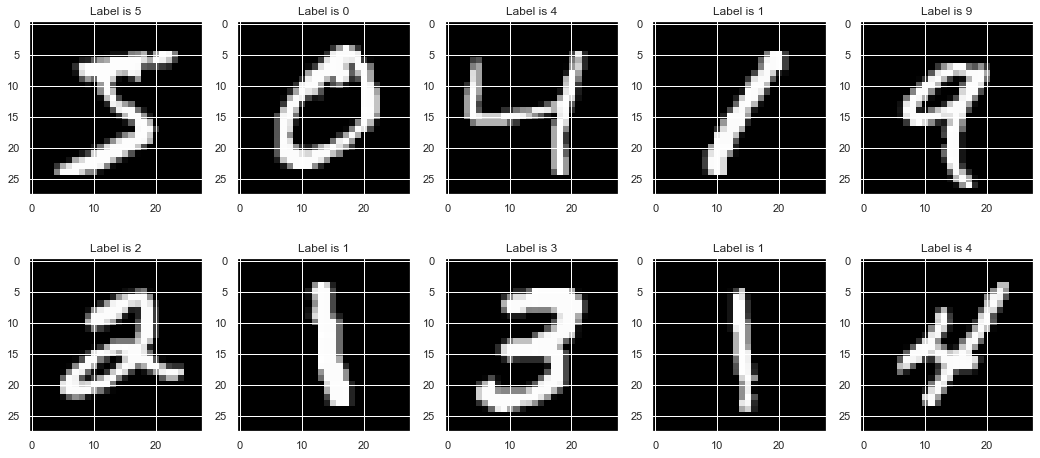

In [11]:
fig, axs = plt.subplots(2,5, figsize=(18, 8))
axs = axs.ravel()

for i in range(0,10):
    image = X[i]
    image = np.array(image, dtype='int')
    pixels = image.reshape((28, 28))
    axs[i].imshow(pixels, cmap='gray')
    axs[i].set_title('Label is '+str(Y[i]))

Let's visualize one of the image content and check that how pixels are distrubted within 28x28 images

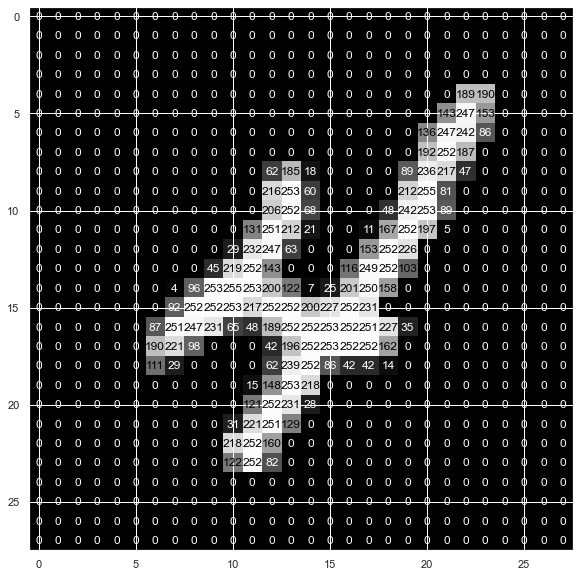

In [12]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

first_image = X[9]
first_image = np.array(first_image, dtype='int')
pixels = first_image.reshape((28, 28)) 
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(pixels, ax)

#### Task: Perform Train Test split with test size 15% and random_state=42

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, random_state=42, shuffle=True)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(59500, 784) (59500,)
(10500, 784) (10500,)


Importing and Applying PCA. Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [14]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95,random_state=42)

Fit transform training and testing images using PCA model instance

In [15]:
pca.fit(xtrain)


train_img=pca.transform(xtrain)
test_img=pca.transform(xtest)

Now checking principal components of training and testing images after applying PCA which are represnting 95% variance of original images data

In [16]:
print(train_img.shape,ytrain.shape)
print(test_img.shape,ytest.shape)

(59500, 154) (59500,)
(10500, 154) (10500,)


Now let's use Logistic regression to perform image classification

In [17]:
from sklearn.linear_model import LogisticRegression
import timeit

#### Task: Define instance of Logistic regression with solver as 'lbfgs', multi_class as 'multinomial', max_iter=300 and random state as 42

In [18]:
model=LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)

#### Task: Fit model on training images and training label

In [19]:
model.fit(train_img,ytrain)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300, multi_class='multinomial', random_state=42)

#### Task: Get Prediction on testing images

In [20]:
pred=model.predict(test_img)

In [2]:
pred

#### Task: Calculate and print accuracy score for predictions

In [21]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(ytest,pred)
print(accuracy)

0.9141904761904762


#### Task: Print classification report  and analyze

In [22]:
from sklearn.metrics import classification_report

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1035
           1       0.92      0.97      0.95      1205
           2       0.91      0.89      0.90      1019
           3       0.90      0.88      0.89      1081
           4       0.90      0.92      0.91       968
           5       0.89      0.86      0.88       970
           6       0.93      0.95      0.94      1009
           7       0.92      0.94      0.93      1110
           8       0.91      0.83      0.87      1016
           9       0.90      0.91      0.90      1087

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



#### Task: Get weighted average of F1 score

In [23]:
from sklearn.metrics import f1_score

f1=f1_score(ytest,pred, average='weighted')
print(f1)

0.9137562110318295


Hence we can see that both Acuracy and F1 Score are around 91.4% and it is really good score for 154 components instead of all 784 pixels